# LICIACube Data Review

## LEIA Images

### Raw data

In [78]:
# get files

from glob import glob

phases = ['approach', 'final']

datadir = ['./data/liciacube_updated_2/leia_raw/' + x for x in phases]
files = np.concatenate([glob(d + '/**/*.fits', recursive=True) for d in datadir])
files.sort()
print(len(files))

335


In [79]:
## collect fits info
# raw

from jylipy.image import CollectFITSHeaderInfo

keys = ['naxis1', 'naxis2', 'target', 'mphase', 'img_utc', 'exptime', 'gain', 'binning', 'dettemp', 'winxsta', 'winxend', 'winysta', 'winyend', 'cort_utc',
        'bore_ra', 'bore_dec', 'celn_clk', 'sun_clk', 'shdist', 'sscrng', 'ssphase', 'sselon', 'ssublat', 'ssublon', 'sssollat', 'sssollon']
keys = [(x, 0) for x in keys]

imset = CollectFITSHeaderInfo(files, fields=keys)
imset.collect()
imset.write('data_leiaraw_keys_updated_2.csv', overwrite=True)


In [80]:
# check a few keywords

from astropy.io import ascii

keys_to_check = ['target', 'gain', 'binning', 'winxsta', 'winxend', 'winysta', 'winyend', 'naxis1', 'naxis2']

meta = ascii.read('data_leiaraw_keys.csv')
for k in keys_to_check:
    print(k, np.array(np.unique(meta[k])))
    print()


target ['Dimorphos']

gain [1]

binning ['OFF']

winxsta [ -1 767 820]

winxend [  -1 1279 1570]

winysta [ -1 345 767]

winyend [  -1 1095 1279]

naxis1 [ 512  750 2048]

naxis2 [ 512  750 2048]



### Calibrated Data

In [81]:
# get files

from glob import glob

phases = ['approach', 'final']

datadir = ['./data/liciacube_updated_2/leia_calibrated/' + x for x in phases]
files = np.concatenate([glob(d + '/**/*.fits', recursive=True) for d in datadir])
files.sort()
print(len(files))

305


In [82]:
## collect fits info
# cal

from jylipy.image import CollectFITSHeaderInfo

keys = ['naxis1', 'naxis2', 'target', 'mphase', 'img_utc', 'exptime', 'gain', 'binning', 'dettemp', 'winxsta', 'winxend', 'winysta', 'winyend', 'cort_utc',
        'bore_ra', 'bore_dec', 'celn_clk', 'sun_clk', 'shdist', 'sscrng', 'ssphase', 'sselon', 'ssublat', 'ssublon', 'sssollat', 'sssollon',
        'radconv']

keys = [(x, 0) for x in keys]

imset = CollectFITSHeaderInfo(files, fields=keys)
imset.collect()
imset.write('data_leiacal_keys_updated_2.csv', overwrite=True)


In [12]:
# check a few keywords

from astropy.io import ascii

keys_to_check = ['target', 'gain', 'binning', 'winxsta', 'winxend', 'winysta', 'winyend', 'radconv', 'naxis1', 'naxis2']

meta = ascii.read('data_leiacal_keys.csv')
for k in keys_to_check:
    print(k, np.array(np.unique(meta[k])))
    print()


target ['Dimorphos']

gain [1]

binning ['OFF']

winxsta [-1]

winxend [-1]

winysta [-1]

winyend [-1]

radconv [1]

naxis1 [2048]

naxis2 [2048]



### Compare Raw and Cal

In [83]:
import os
from astropy.io import ascii

raw = ascii.read('data_leiaraw_keys_updated_2.csv')
raw.sort('file')
cal = ascii.read('data_leiacal_keys_updated_2.csv')
cal.sort('file')

raw_id = set(['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in raw['file']])
cal_id = set(['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in cal['file']])

diff_id = raw_id.difference(cal_id)

print('{} images in raw'.format(len(raw_id)))
print('{} images in cal'.format(len(cal_id)))
print('{} images in raw but not in cal'.format(len(diff_id)))

335 images in raw
305 images in cal
30 images in raw but not in cal


In [84]:
raw_id = np.sort(np.array(list(raw_id)))
idx = [i for i, a in enumerate(raw_id) if a in diff_id]
diff = raw[idx]
diff

file,naxis1,naxis2,target,mphase,img_utc,exptime,gain,binning,dettemp,winxsta,winxend,winysta,winyend,cort_utc,bore_ra,bore_dec,celn_clk,sun_clk,shdist,sscrng,ssphase,sselon,ssublat,ssublon,sssollat,sssollon
str87,int64,int64,str9,str8,str23,float64,int64,str3,float64,int64,int64,int64,int64,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174029_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:47:09.000,0.000200000002980232,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:47:08.750,36.526499,8.955692,17.61,89.33,1.08,6516600.0,131.88,189.61,-9.35,115.66,-11.4,68.48
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174039_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:47:19.002,0.002,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:47:18.753,36.526317,8.951574,17.62,89.34,1.08,6516600.0,131.88,189.61,-9.35,115.21,-11.4,68.04
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174059_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:47:39.000,0.000200000002980232,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:47:38.750,36.526834,8.954574,17.61,89.33,1.08,6516400.0,131.88,189.6,-9.35,114.33,-11.4,67.15
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174069_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:47:49.002,0.002,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:47:48.753,36.527789,8.953476,17.61,89.34,1.08,6516400.0,131.88,189.61,-9.35,113.89,-11.4,66.71
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174079_00006_01.fits,512,512,Dimorphos,approach,2022-09-14T16:47:59.006,0.006,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:47:58.759,36.526315,8.952962,17.61,89.34,1.08,6516300.0,131.88,189.61,-9.35,113.44,-11.4,66.27
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174089_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:09.000,0.000200000002980232,1,OFF,18.12734082397005,767,1279,767,1279,2022-09-14T16:48:08.750,36.524983,8.95602,17.61,89.33,1.08,6516200.0,131.88,189.6,-9.35,113.0,-11.4,65.82
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174099_00002_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:19.002,0.002,1,OFF,20.00000000000001,767,1279,767,1279,2022-09-14T16:48:18.753,36.525318,8.954295,17.61,89.33,1.08,6516200.0,131.88,189.6,-9.35,112.56,-11.4,65.38
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663174109_00006_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:29.006,0.006,1,OFF,20.00000000000001,767,1279,767,1279,2022-09-14T16:48:28.759,36.525172,8.956015,17.61,89.33,1.08,6516100.0,131.88,189.61,-9.35,112.12,-11.4,64.94
./data/liciacube_updated_2/leia_raw/approach/liciacube_leia_l0_1663487617_00002_01.fits,512,512,Dimorphos,approach,2022-09-18T07:53:37.000,0.000200000002980232,1,OFF,21.87265917602997,767,1279,767,1279,2022-09-18T07:53:36.750,278.26503,63.823391,169.65,90.0,1.07,4586900.0,128.42,311.67,-9.32,280.34,-10.9,229.22


In [85]:
import jylipy as jp
d = jp.getds9('didy')

im = fits.open(diff['file'][0])
d.imdisp(im[0].data)

0

In [87]:
# Compare keyword values

from astropy.io import ascii

raw = ascii.read('./data_leiaraw_keys_updated_2.csv')
cal = ascii.read('./data_leiacal_keys_updated_2.csv')
cal_imgid = ['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in cal['file']]

keys = list(raw.keys())
keys.remove('file')

for r in raw[:1]:
    imgid = '_'.join(os.path.basename(r['file']).split('_')[-3:-1])
    if imgid not in cal_imgid:
        continue
    idx = cal_imgid == imgid
    rcal = cal[idx]
    for k in keys:
        if r[k] != rcal[k]:
            print('{}, {}: {}, {}'.format(os.path.basename(r['file']), k, r[k], rcal[k]))

## LUKE Images

### Raw data

In [88]:
# get files

from glob import glob

phases = ['approach', 'final']

datadir = ['./data/liciacube_updated_2/luke_raw/' + x for x in phases]
files = np.concatenate([glob(d + '/**/*.fits', recursive=True) for d in datadir])
files.sort()
print(len(files))

274


In [89]:
## collect fits info
# raw

from jylipy.image import CollectFITSHeaderInfo

keys = ['naxis1', 'naxis2', 'target', 'mphase', 'img_utc', 'exptime', 'gain', 'binning', 'dettemp', 'winxsta', 'winxend', 'winysta', 'winyend', 'cort_utc',
        'bore_ra', 'bore_dec', 'celn_clk', 'sun_clk', 'shdist', 'sscrng', 'ssphase', 'sselon', 'ssublat', 'ssublon', 'sssollat', 'sssollon']
keys = [(x, 0) for x in keys]

imset = CollectFITSHeaderInfo(files, fields=keys)
imset.collect()
imset.write('data_lukeraw_keys_updated_2.csv', overwrite=True)


In [90]:
# check a few keywords

from astropy.io import ascii

keys_to_check = ['target', 'gain', 'binning', 'winxsta', 'winxend', 'winysta', 'winyend', 'naxis1', 'naxis2', 'dettemp']

meta = ascii.read('data_lukeraw_keys_updated_2.csv')
for k in keys_to_check:
    print(k, np.array(np.unique(meta[k])))
    print()


target ['Dimorphos']

gain [1]

binning ['OFF']

winxsta [ -1 767]

winxend [  -1 1279]

winysta [ -1 287]

winyend [ -1 799]

naxis1 [ 512 2048]

naxis2 [ 512 1088]

dettemp [-1000.      30.5     31.      32.5     32.75    34.      34.25    34.5
    34.75    35.      35.25    35.75    36.25    37.25    37.5     38.
    38.25    38.75    39.      39.25]



### Calibrated Data

In [91]:
# get files

from glob import glob

phases = ['approach', 'final']

datadir = ['./data/liciacube_updated_2/luke_calibrated/' + x for x in phases]
files = np.concatenate([glob(d + '/**/*.fits', recursive=True) for d in datadir])
files.sort()
print(len(files))

267


In [92]:
## collect fits info
# cal

from jylipy.image import CollectFITSHeaderInfo

keys = ['naxis1', 'naxis2', 'target', 'mphase', 'img_utc', 'exptime', 'gain', 'binning', 'dettemp', 'winxsta', 'winxend', 'winysta', 'winyend', 'cort_utc',
        'bore_ra', 'bore_dec', 'celn_clk', 'sun_clk', 'shdist', 'sscrng', 'ssphase', 'sselon', 'ssublat', 'ssublon', 'sssollat', 'sssollon',
        'radconv']

keys = [(x, 0) for x in keys]

imset = CollectFITSHeaderInfo(files, fields=keys)
imset.collect()
imset.write('data_lukecal_keys_updated_2.csv', overwrite=True)


In [93]:
# check a few keywords

from astropy.io import ascii

keys_to_check = ['target', 'gain', 'binning', 'winxsta', 'winxend', 'winysta', 'winyend', 'radconv', 'naxis1', 'naxis2', 'dettemp']

meta = ascii.read('data_lukecal_keys_updated_2.csv')
for k in keys_to_check:
    print(k, np.array(np.unique(meta[k])))
    print()


target ['Dimorphos']

gain [1]

binning ['OFF']

winxsta [-1]

winxend [-1]

winysta [-1]

winyend [-1]

radconv [1]

naxis1 [2048]

naxis2 [1088]

dettemp [-1000.      30.5     31.      32.75    34.      34.25    34.5     34.75
    35.      35.25    35.75    36.25    37.25    37.5     38.      38.25
    38.75    39.      39.25]



### Compare Raw and Cal

In [94]:
from astropy.io import ascii

raw = ascii.read('data_lukeraw_keys_updated_2.csv')
raw.sort('file')
cal = ascii.read('data_lukecal_keys_updated_2.csv')
cal.sort('file')

raw_id = set(['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in raw['file']])
cal_id = set(['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in cal['file']])

diff_id = raw_id.difference(cal_id)

print('{} images in raw'.format(len(raw_id)))
print('{} images in cal'.format(len(cal_id)))
print('{} images in raw but not in cal'.format(len(diff_id)))

274 images in raw
267 images in cal
7 images in raw but not in cal


In [95]:
raw_id = np.sort(np.array(list(raw_id)))
idx = [i for i, a in enumerate(list(raw_id)) if a in diff_id]
diff = raw[idx]
diff

file,naxis1,naxis2,target,mphase,img_utc,exptime,gain,binning,dettemp,winxsta,winxend,winysta,winyend,cort_utc,bore_ra,bore_dec,celn_clk,sun_clk,shdist,sscrng,ssphase,sselon,ssublat,ssublon,sssollat,sssollon
str87,int64,int64,str9,str8,str23,float64,int64,str3,float64,int64,int64,int64,int64,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174119_00006_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:39.000,0.000600000023841857,1,OFF,-1000.0,767,1279,287,799,2022-09-14T16:48:38.909,36.025735,8.406104,17.69,89.73,1.08,6516100.0,131.88,189.54,-9.35,111.67,-11.4,64.5
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174129_00006_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:49.000,0.000600000023841857,1,OFF,32.5,767,1279,287,799,2022-09-14T16:48:48.909,36.024028,8.407441,17.68,89.73,1.08,6516000.0,131.88,189.54,-9.35,111.23,-11.4,64.05
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174129_00156_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:49.015,0.015,1,OFF,32.5,767,1279,287,799,2022-09-14T16:48:48.917,36.024025,8.407443,17.68,89.73,1.08,6516000.0,131.88,189.54,-9.35,111.23,-11.4,64.05
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174129_01056_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:49.105,0.09,1,OFF,32.5,767,1279,287,799,2022-09-14T16:48:48.970,36.02401,8.407455,17.68,89.73,1.08,6516000.0,131.88,189.54,-9.35,111.23,-11.4,64.05
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174139_00006_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:59.000,0.000600000023841857,1,OFF,32.75,767,1279,287,799,2022-09-14T16:48:58.909,36.024114,8.406742,17.68,89.73,1.08,6515900.0,131.88,189.54,-9.35,110.79,-11.4,63.61
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174139_00156_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:59.015,0.015,1,OFF,32.75,767,1279,287,799,2022-09-14T16:48:58.917,36.024116,8.406739,17.68,89.73,1.08,6515900.0,131.88,189.54,-9.35,110.79,-11.4,63.61
./data/liciacube_updated_2/luke_raw/approach/liciacube_luke_l0_1663174139_01056_01.fits,512,512,Dimorphos,approach,2022-09-14T16:48:59.105,0.09,1,OFF,32.75,767,1279,287,799,2022-09-14T16:48:58.970,36.024127,8.40672,17.68,89.73,1.08,6515900.0,131.88,189.54,-9.35,110.78,-11.4,63.61


In [37]:
d = jp.getds9('didy')

im = fits.open(diff['file'][0])
d.imdisp(im[0].data)

0

In [38]:
im = fits.open(raw['file'][100])
d.imdisp(im[0].data)

0

In [39]:
im = fits.open(cal['file'][200])
im.info()

d.imdisp(im[0].data)

Filename: ./data/liciacube_updated/luke_calibrated/final/liciacube_luke_l2_1664234256_00245_01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   (2048, 1088, 3)   float32   


[0, 0, 0]

In [97]:
# Compare keyword values

from astropy.io import ascii

raw = ascii.read('./data_lukeraw_keys_updated_2.csv')
cal = ascii.read('./data_lukecal_keys_updated_2.csv')
cal_imgid = ['_'.join(os.path.basename(f).split('_')[-3:-1]) for f in cal['file']]

keys = list(raw.keys())
keys.remove('file')

for r in raw[:1]:
    imgid = '_'.join(os.path.basename(r['file']).split('_')[-3:-1])
    if imgid not in cal_imgid:
        continue
    idx = cal_imgid == imgid
    rcal = cal[idx]
    for k in keys:
        if r[k] != rcal[k]:
            print('{}, {}: {}, {}'.format(os.path.basename(r['file']), k, r[k], rcal[k]))

## Check Geometry

### Compare with SPICE calculation

In [99]:
from astropy.table import Table
from jylipy.vector import vecsep


from astropy.io import ascii

level = 'cal'
cam = 'leia'
outfile = 'geometry_{}{}_20231127.csv'.format(cam, level)

metaraw = ascii.read('data_{}{}_keys_updated.csv'.format(cam, level))
nimg = len(metaraw)

spice.furnsh('dart_v02.tm')
spice.furnsh('./spice/pck/didymos_system_15.tpc')
spice.furnsh('./spice/fk/didymos_system_007.tf')
#spice.furnsh('licia_pds.tm')
#spice.furnsh('20230328_LCC_SOC.mk')
#spice.furnsh('./spice/pck/didymos_system_12.tpc')
#spice.furnsh('./spice/pck/didymos_system_03.tpc')
#spice.furnsh('./spice/pck/didymos_d311_s104_02.tpc')
#spice.furnsh('./spice/pck/didymos_d300_s101_01.tpc')
#spice.furnsh('./spice/pck/dimorphos_s501-preimp.tpc')
#spice.furnsh('./spice/pck/dimorphos_d300_s101_01.tpc')

print(spice.gdpool('BODY120065803_PM', 0, 3))

utc = np.empty(nimg, dtype='<U23')
rh = np.empty(nimg)  # shdist
delta = np.empty_like(rh)  # sscrng
phase = np.empty_like(rh)  # ssphase
sublat = np.empty_like(rh)  # ssublat
sublon = np.empty_like(rh)  # ssublon
sollat = np.empty_like(rh)  # sssollat
sollon = np.empty_like(rh)  # sssollon

#licia = spice.bodn2c('liciacube')
licia = -210

for i, r in enumerate(metaraw):
    
    #et = spice.scs2e(licia, str(r['img_time']))
    #utc[i] = spice.et2utc(et, 'isoc', 3)
    utc[i] = r['img_utc']
    et = spice.str2et(utc[i])
    
    # compute in J2000
    #st1, lt1 = spice.spkezr('dimorphos', et, 'j2000', 'lt+s', 'dart')
    #delta.append(np.sqrt(st1[0] * st1[0] + st1[1] * st1[1] + st1[2] * st1[2]))
    #st2, lt2 = spice.spkezr('sun', et - lt1, 'j2000', 'lt+s', 'dimorphos')
    #rh.append(np.sqrt(st2[0] * st2[0] + st2[1] * st2[1] + st2[2] * st2[2]))
    #phase.append(vecsep(-np.array(st1[:2]), st2[:2]))
    
    # compute in dimorphos_fixed frame
    st1, lt1 = spice.spkezr('dimorphos', et, 'dimorphos_fixed', 'lt+s', '-210')#'liciacube')
    r1, ra1, dec1 = spice.recrad(-np.array(st1[:3]))
    sublat[i] = (np.rad2deg(dec1))
    sublon[i] = (np.rad2deg(ra1))
    delta[i] = r1
    
    st2, lt2 = spice.spkezr('sun', et - lt1, 'dimorphos_fixed', 'lt+s', 'dimorphos')
    r2, ra2, dec2 = spice.recrad(st2[:3])
    sollat[i] = np.rad2deg(dec2)
    sollon[i] = np.rad2deg(ra2)
    rh[i] = r2
    
    phase[i] = vecsep(-np.array(st1[:3]), st2[:3])

spice.kclear()
rh = rh * u.km.to('au')
sublon = (sublon + 360) % 360
#sublon[sublon > 180] -= 360
sollon = (sollon + 360) % 360
#sollon[sollon > 180] -= 360

geom = Table([utc, rh, delta, phase, sublat, sublon, sollat, sollon], names=['utc', 'rh', 'delta', 'phase', 'sublat', 'sublon', 'sollat', 'sollon'])
geom.write(outfile, overwrite=True)

[7.30705651e+01 7.24724388e+02 1.02707361e-06]


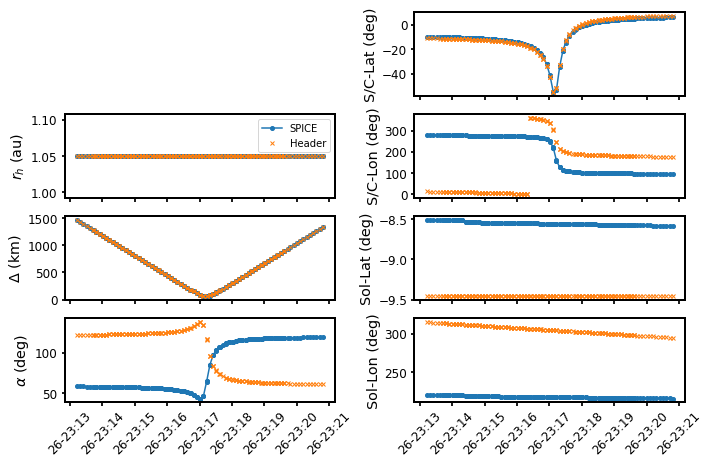

In [100]:
# compare

import jylipy as jp
from astropy.time import Time
from astropy.io import ascii


#level = 'raw'
#cam = 'luke'
#outfile = 'geometry_{}{}_liciatm230328.csv'.format(cam, level)
#outfile = 'geometry_lukeraw_liciatm221104.csv'

geom = ascii.read(outfile)
metaraw = ascii.read('data_{}{}_keys_updated_2.csv'.format(cam, level))
ts = Time(metaraw['img_utc'])
#ww = range(len(ts))
ww = (ts > Time('2022-09-26T23:10')) & (ts < Time('2022-09-26T23:22'))

# adjust precision to match header key value precisions
for k in ['rh', 'phase', 'sublat', 'sublon', 'sollat', 'sollon']:
    geom[k] = np.round(geom[k], 2)
order = 10**np.floor(np.log10(geom['delta']))
geom['delta'] = np.round(geom['delta'] / order, 4) * order   # 5 significant digits


f, ax = plt.subplots(4, 2, figsize=(10, 6), sharex=True)

ax[0, 0].axis('off')

ax[1, 0].plot_date(ts.plot_date[ww], geom['rh'][ww], '-o')
ax[1, 0].plot_date(ts.plot_date[ww], metaraw['shdist'][ww], 'x')
jp.pplot(ax[1, 0], ylabel=r'$r_h$ (au)')
ax[2, 0].plot_date(ts.plot_date[ww], geom['delta'][ww], '-o')
ax[2, 0].plot_date(ts.plot_date[ww], metaraw['sscrng'][ww], 'x')
jp.pplot(ax[2, 0], ylabel=r'$\Delta$ (km)')
ax[3, 0].plot_date(ts.plot_date[ww], geom['phase'][ww], '-o')
ax[3, 0].plot_date(ts.plot_date[ww], metaraw['ssphase'][ww], 'x')
jp.pplot(ax[3, 0], ylabel=r'$\alpha$ (deg)')
ax[0, 1].plot_date(ts.plot_date[ww], geom['sublat'][ww], '-o')
ax[0, 1].plot_date(ts.plot_date[ww], metaraw['ssublat'][ww], 'x')
jp.pplot(ax[0, 1], ylabel=r'S/C-Lat (deg)')
ax[1, 1].plot_date(ts.plot_date[ww], geom['sublon'][ww], '-o')
ax[1, 1].plot_date(ts.plot_date[ww], metaraw['ssublon'][ww], 'x')
jp.pplot(ax[1, 1], ylabel=r'S/C-Lon (deg)')
ax[2, 1].plot_date(ts.plot_date[ww], geom['sollat'][ww], '-o')
ax[2, 1].plot_date(ts.plot_date[ww], metaraw['sssollat'][ww], 'x')
jp.pplot(ax[2, 1], ylabel=r'Sol-Lat (deg)')
ax[3, 1].plot_date(ts.plot_date[ww], geom['sollon'][ww], '-o')
ax[3, 1].plot_date(ts.plot_date[ww], metaraw['sssollon'][ww], 'x')
jp.pplot(ax[3, 1], ylabel=r'Sol-Lon (deg)')
ax[1, 0].legend(['SPICE', 'Header'])

from matplotlib.dates import DateFormatter
ax[3, 0].xaxis.set_major_formatter(DateFormatter('%d-%H:%M') )
ax[3, 1].xaxis.set_major_formatter(DateFormatter('%d-%H:%M') )

ax[3, 0].xaxis.set_tick_params(rotation=45)
ax[3, 1].xaxis.set_tick_params(rotation=45)

#plt.savefig('compare_geom_{}.png'.format(level))

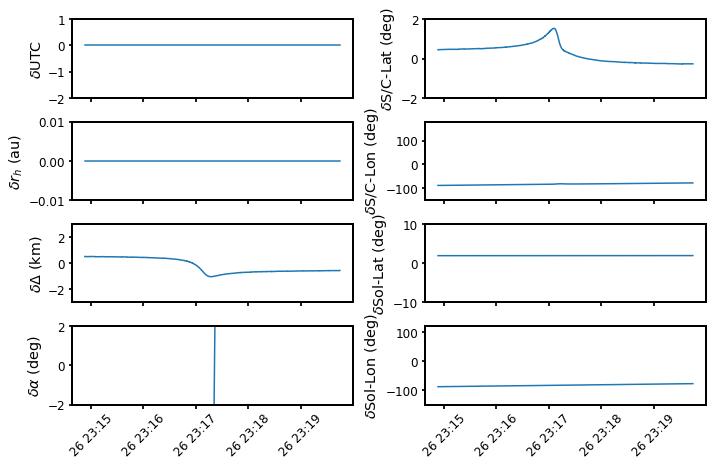

In [30]:
# plot difference between my calculation and fits header values

from astropy.time import Time
from astropy.io import ascii

#geom = ascii.read('geometry_{}.csv'.format(level))
#ts = Time(metaraw['acq_utc'])

# adjust precision to match header key value precisions
for k in ['rh', 'phase', 'sublat', 'sublon', 'sollat', 'sollon']:
    geom[k] = np.round(geom[k], 2)
order = 10**np.floor(np.log10(geom['delta']))
geom['delta'] = np.round(geom['delta'] / order, 4) * order   # 5 significant digits

f, ax = plt.subplots(4, 2, figsize=(10, 6), sharex=True)

#ax[0, 0].axis('off')
ax[0, 0].plot_date(ts.plot_date[ww], (Time(geom['utc']) - ts).to('s')[ww], '-')
jp.pplot(ax[0, 0], ylim=[-2, 1], ylabel=r'$\delta$UTC')

ax[1, 0].plot_date(ts.plot_date[ww], geom['rh'][ww] - metaraw['shdist'][ww], '-')
jp.pplot(ax[1, 0], ylim=[-1e-2, 1e-2], ylabel=r'$\delta r_h$ (au)')

ax[2, 0].plot_date(ts.plot_date[ww], geom['delta'][ww] - metaraw['sscrng'][ww], '-')
jp.pplot(ax[2, 0], ylim=[-3, 3], ylabel=r'$\delta \Delta$ (km)')

ax[3, 0].plot_date(ts.plot_date[ww], geom['phase'][ww] - metaraw['ssphase'][ww], '-')
jp.pplot(ax[3, 0], ylim=[-2, 2], ylabel=r'$\delta \alpha$ (deg)')

ax[0, 1].plot_date(ts.plot_date[ww], geom['sublat'][ww] - metaraw['ssublat'][ww], '-')
jp.pplot(ax[0, 1], ylim=[-2, 2], ylabel=r'$\delta$S/C-Lat (deg)')

ax[1, 1].plot_date(ts.plot_date[ww], ((geom['sublon'][ww] - metaraw['ssublon'][ww]) + 180) % 360 - 180, '-')
jp.pplot(ax[1, 1], ylim=[-150, 180], ylabel=r'$\delta$S/C-Lon (deg)')

ax[2, 1].plot_date(ts.plot_date[ww], geom['sollat'][ww] - metaraw['sssollat'][ww], '-')
jp.pplot(ax[2, 1], ylim=[-10, 10], ylabel=r'$\delta$Sol-Lat (deg)')

ax[3, 1].plot_date(ts.plot_date[ww], ((geom['sollon'][ww] - metaraw['sssollon'][ww]) + 180) % 360 - 180, '-')
jp.pplot(ax[3, 1], ylim=[-150, 120], ylabel=r'$\delta$Sol-Lon (deg)')

ax[3, 0].xaxis.set_tick_params(rotation=45)
ax[3, 1].xaxis.set_tick_params(rotation=45)

#plt.savefig('compare_geom_{}.png'.format(level))

### Compare LEIA and LUKE

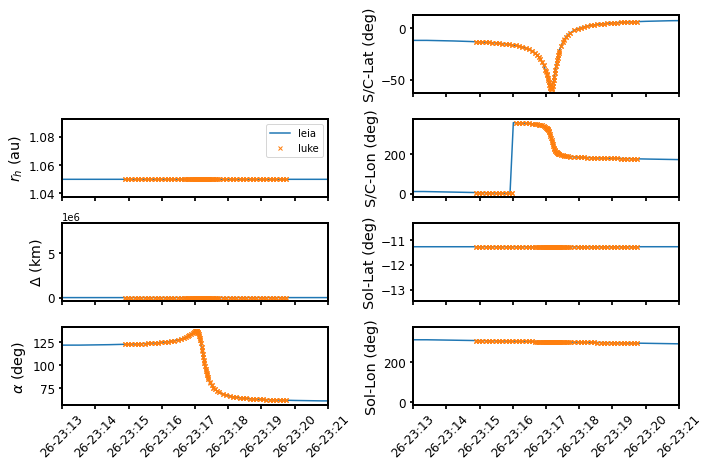

In [34]:
from astropy.io import ascii
from astropy.time import Time

leia = ascii.read('./data_leiaraw_keys_updated.csv')
luke = ascii.read('./data_lukeraw_keys_updated.csv')

ts_leia = Time(leia['cort_utc'])
ts_luke = Time(luke['cort_utc'])


f, ax = plt.subplots(4, 2, figsize=(10, 6), sharex=True)

ax[0, 0].axis('off')

ax[1, 0].plot_date(ts_leia.plot_date, leia['shdist'], '-')
ax[1, 0].plot_date(ts_luke.plot_date, luke['shdist'], 'x')
jp.pplot(ax[1, 0], ylabel=r'$r_h$ (au)')
ax[2, 0].plot_date(ts_leia.plot_date, leia['sscrng'], '-')
ax[2, 0].plot_date(ts_luke.plot_date, luke['sscrng'], 'x')
jp.pplot(ax[2, 0], ylabel=r'$\Delta$ (km)')
ax[3, 0].plot_date(ts_leia.plot_date, leia['ssphase'], '-')
ax[3, 0].plot_date(ts_luke.plot_date, luke['ssphase'], 'x')
jp.pplot(ax[3, 0], ylabel=r'$\alpha$ (deg)')
ax[0, 1].plot_date(ts_leia.plot_date, leia['ssublat'], '-')
ax[0, 1].plot_date(ts_luke.plot_date, luke['ssublat'], 'x')
jp.pplot(ax[0, 1], ylabel=r'S/C-Lat (deg)')
ax[1, 1].plot_date(ts_leia.plot_date, leia['ssublon'], '-')
ax[1, 1].plot_date(ts_luke.plot_date, luke['ssublon'], 'x')
jp.pplot(ax[1, 1], ylabel=r'S/C-Lon (deg)')
ax[2, 1].plot_date(ts_leia.plot_date, leia['sssollat'], '-')
ax[2, 1].plot_date(ts_luke.plot_date, luke['sssollat'], 'x')
jp.pplot(ax[2, 1], ylabel=r'Sol-Lat (deg)')
ax[3, 1].plot_date(ts_leia.plot_date, leia['sssollon'], '-')
ax[3, 1].plot_date(ts_luke.plot_date, luke['sssollon'], 'x')
jp.pplot(ax[3, 1], ylabel=r'Sol-Lon (deg)', xlim=Time(['2022-09-26T23:13', '2022-09-26T23:21']).plot_date)
ax[1, 0].legend(['leia', 'luke'])

from matplotlib.dates import DateFormatter
ax[3, 0].xaxis.set_major_formatter(DateFormatter('%d-%H:%M') )
ax[3, 1].xaxis.set_major_formatter(DateFormatter('%d-%H:%M') )

ax[3, 0].xaxis.set_tick_params(rotation=45)
ax[3, 1].xaxis.set_tick_params(rotation=45)

#plt.savefig('compare_geom_{}.png'.format(level))

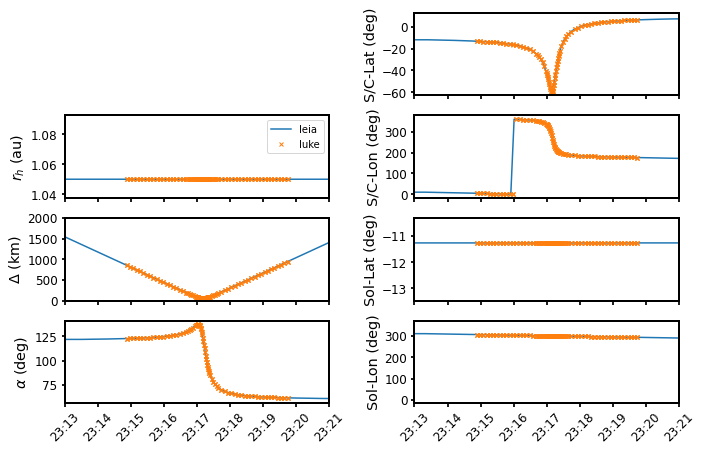

In [35]:
from astropy.io import ascii
from astropy.time import Time

leia = ascii.read('./data_leiaraw_keys_updated.csv')
luke = ascii.read('./data_lukeraw_keys_updated.csv')

ts_leia = Time(leia['cort_utc'])
ts_luke = Time(luke['cort_utc'])


f, ax = plt.subplots(4, 2, figsize=(10, 6), sharex=True)

ax[0, 0].axis('off')

ax[1, 0].plot_date(ts_leia.plot_date, leia['shdist'], '-')
ax[1, 0].plot_date(ts_luke.plot_date, luke['shdist'], 'x')
jp.pplot(ax[1, 0], ylabel=r'$r_h$ (au)')
ax[2, 0].plot_date(ts_leia.plot_date, leia['sscrng'], '-')
ax[2, 0].plot_date(ts_luke.plot_date, luke['sscrng'], 'x')
jp.pplot(ax[2, 0], ylabel=r'$\Delta$ (km)', ylim=[0, 2e3])
ax[3, 0].plot_date(ts_leia.plot_date, leia['ssphase'], '-')
ax[3, 0].plot_date(ts_luke.plot_date, luke['ssphase'], 'x')
jp.pplot(ax[3, 0], ylabel=r'$\alpha$ (deg)')
ax[0, 1].plot_date(ts_leia.plot_date, leia['ssublat'], '-')
ax[0, 1].plot_date(ts_luke.plot_date, luke['ssublat'], 'x')
jp.pplot(ax[0, 1], ylabel=r'S/C-Lat (deg)')
ax[1, 1].plot_date(ts_leia.plot_date, leia['ssublon'], '-')
ax[1, 1].plot_date(ts_luke.plot_date, luke['ssublon'], 'x')
jp.pplot(ax[1, 1], ylabel=r'S/C-Lon (deg)')
ax[2, 1].plot_date(ts_leia.plot_date, leia['sssollat'], '-')
ax[2, 1].plot_date(ts_luke.plot_date, luke['sssollat'], 'x')
jp.pplot(ax[2, 1], ylabel=r'Sol-Lat (deg)')
ax[3, 1].plot_date(ts_leia.plot_date, leia['sssollon'], '-')
ax[3, 1].plot_date(ts_luke.plot_date, luke['sssollon'], 'x')
jp.pplot(ax[3, 1], ylabel=r'Sol-Lon (deg)', xlim=Time(['2022-09-26T23:13:00', '2022-09-26T23:21']).plot_date)
ax[1, 0].legend(['leia', 'luke'])

from matplotlib.dates import DateFormatter
ax[3, 0].xaxis.set_major_formatter(DateFormatter('%H:%M') )
ax[3, 1].xaxis.set_major_formatter(DateFormatter('%H:%M') )

ax[3, 0].xaxis.set_tick_params(rotation=45)
ax[3, 1].xaxis.set_tick_params(rotation=45)

#plt.savefig('compare_geom_{}.png'.format(level))

### Compare with DRACO

Compare the geometry calculation with DRACO images for the overlapping times.  Due to the different s/c position, only the heliocentric distance and subsolar latitude should be compared.

In [36]:
from astropy.io import ascii
from astropy.time import Time

draco = ascii.read('./data_dracocal_keys.csv')
draco = draco[Time(draco['acq_utc']) > Time('2022-09-13')]
draco = draco['acq_utc', 'SHDIST', 'SSSOLLAT']
draco = draco[draco['SHDIST'] > 0]
print(len(draco))

licia = ascii.read('./data_leiaraw_keys_updated.csv')
licia = licia['img_utc', 'shdist', 'sssollat']
print(len(licia))

29711
335


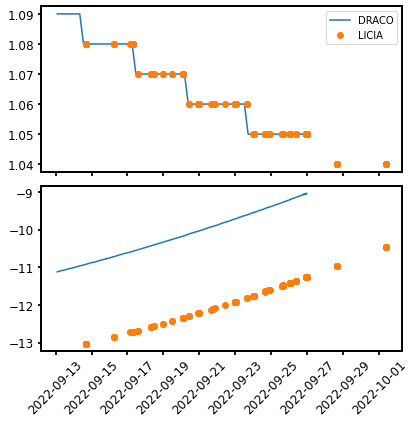

In [37]:
from astropy.time import Time

f, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ts_draco = Time(draco['acq_utc'])
ax[0].plot_date(ts_draco.plot_date, draco['SHDIST'], '-')
ts_licia = Time(licia['img_utc'])
ax[0].plot_date(ts_licia.plot_date, licia['shdist'])
ax[0].legend(['DRACO', 'LICIA'])
jp.pplot(ax[0], skipline=True)

ax[1].plot_date(ts_draco.plot_date, draco['SSSOLLAT'], '-')
ax[1].plot_date(ts_licia.plot_date, licia['sssollat'])
ax[1].xaxis.set_tick_params(rotation=45)
jp.pplot(ax[1], skipline=True)

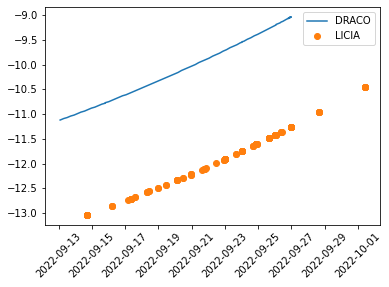

In [38]:
from astropy.time import Time

ts_draco = Time(draco['acq_utc'])
plt.plot_date(ts_draco.plot_date, draco['SSSOLLAT'], '-')
ts_licia = Time(licia['img_utc'])
plt.plot_date(ts_licia.plot_date, licia['sssollat'])

plt.gca().xaxis.set_tick_params(rotation=45)
plt.legend(['DRACO', 'LICIA'])

## Spot Check Images

./data/liciacube_updated/leia_calibrated/final/liciacube_leia_l2_1664234197_00105_01.fits
Filename: ./data/liciacube_updated/leia_calibrated/final/liciacube_leia_l2_1664234197_00105_01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2048, 2048)   float32   
png file size:  (1576, 1576, 4)

SIMPLE     = True
BITPIX     = -32
NAXIS      = 2
NAXIS1     = 2048
NAXIS2     = 2048
EXTEND     = True
DATE       = 2022-09-26T23:16:37.105
MISSION    = DART
HOSTNAME   = LICIACube
INSTRUME   = LEIA
APID       = 1
TARGET     = Dimorphos
MPHASE     = final
IMG_UTC    = 2022-09-26T23:16:37.105
SCLKNAME   = LCC220918-SCLK-V1.tsc
READOUT    = 165400.0
EXPTIME    = 0.005
GAIN       = 1
BINNING    = OFF
TRUNC      = MSB
RCNTTHST   = 0
AOCWX      = 0.007481045089662075
AOCWY      = 0.00040058500599116
AOCWZ      = -0.00013020499318372
DETTEMP    = 20.00000000000001
WINXSTA    = -1
WINXEND    = -1
WINYSTA    = -1
WINYEND    = -1
CALFILEG   = lici

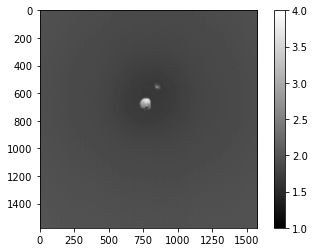

In [39]:
# LEIA

from astropy.io import fits
from PIL import Image


#cam = 'leia'
#level = 'raw'
#phase = 'final'
#imgid = '1664234107_00105'

cam = 'leia'
level = 'cal'
phase = 'final'
imgid = '1664234197_00105'

#cam = 'luke'
#level = 'raw'
#phase = 'final'
#imgid = '1664234195_00051'

#cam = 'luke'
#level = 'cal'
#phase = 'final'
#imgid = '1664234242_00023'


imgfile = './data/liciacube_updated/{}_{}/{}/liciacube_{}_l{}_{}_01.fits'.format(cam, 'raw' if level == 'raw' else 'calibrated', phase, cam, 0 if level == 'raw' else 2, imgid)
print(imgfile)

im = fits.open(imgfile)
im.info()

d = jp.getds9('licia')
d.imdisp(im[0].data)

pngfile = imgfile.replace('.fits', '.png')
png = plt.imread(pngfile)
print('png file size: ', png.shape)
if png.ndim > 2:
    png = png.sum(axis=-1)
png = png[::-1]
plt.imshow(png, cmap='gray')
plt.colorbar()

print()
for k, v in im[0].header.items():
    print('{:10s} = {}'.format(k, v))

## Calibration Data

### LEIA

In [69]:
gen = fits.open('./data/liciacube_updated/leia_calibrated/calibration/liciacube_leia_cal_gen_001.fits')
gen.info()

for k, v in gen[0].header.items():
    print('{:10s} = {}'.format(k, v))

Filename: ./data/liciacube_updated/leia_calibrated/calibration/liciacube_leia_cal_gen_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (2048, 2048, 4)   float64   
SIMPLE     = True
BITPIX     = -64
NAXIS      = 3
NAXIS1     = 2048
NAXIS2     = 2048
NAXIS3     = 4
EXTEND     = True
MISSION    = DART
HOSTNAME   = LICIACube
INSTRUME   = LEIA
CALFILE    = liciacube_leia_cal_gen_001.fits
TRUNC      = MSB
BADMASKV   = -1e+30
PLANE1     = BIAS
PLANE2     = BAD PIXEL MAP
PLANE3     = DARK1
PLANE4     = DARK2


bad pixel map is all 0? True


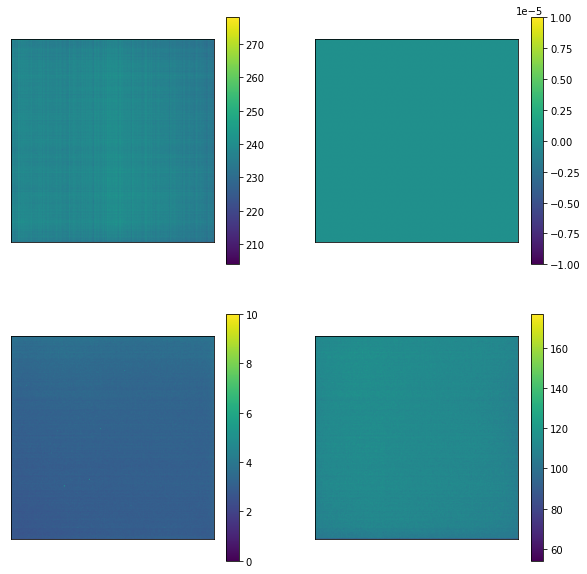

In [71]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

lim = [[204, 278], [-1e-5, 1e-5], [0, 10], [54, 177]]

for plane, a, l in zip(gen[0].data, ax.flatten(), lim):
    m = a.imshow(plane, vmin=l[0], vmax=l[1])
    plt.colorbar(m, ax=a)
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)    
    
print('bad pixel map is all 0? {}'.format(np.allclose(gen[0].data[1], 0)))

In [42]:
d = jp.getds9('licia')
d.imdisp(gen[0].data)

[0, 0, 0, 0]

In [373]:
col = fits.open('./data/leia_calibrated/calibration/liciacube_leia_cal_col_001.fits')
col.info()
for k, v in col[0].header.items():
    print('{:10s} = {}'.format(k, v))

Filename: ./data/leia_calibrated/calibration/liciacube_leia_cal_col_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (3, 4194304, 13)   float64   
SIMPLE     = True
BITPIX     = -64
NAXIS      = 3
NAXIS1     = 3
NAXIS2     = 4194304
NAXIS3     = 13
EXTEND     = True


### LUKE

In [72]:
gen = fits.open('./data/liciacube_updated/luke_calibrated/calibration/liciacube_luke_cal_gen_001.fits')
gen.info()

for k, v in gen[0].header.items():
    print('{:10s} = {}'.format(k, v))

Filename: ./data/liciacube_updated/luke_calibrated/calibration/liciacube_luke_cal_gen_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (2048, 1088, 4)   float32   
SIMPLE     = True
BITPIX     = -32
NAXIS      = 3
NAXIS1     = 2048
NAXIS2     = 1088
NAXIS3     = 4
EXTEND     = True
MISSION    = DART
HOSTNAME   = LICIACube
INSTRUME   = luke
CALFILE    = liciacube_luke_cal_gen_001.fits
TRUNC      = MSB
BADMASKV   = -1e+30
PLANE1     = BIAS
PLANE2     = BAD PIXEL MAP
PLANE3     = DARK1
PLANE4     = DARK2


In [73]:
gen[0].data.shape

(4, 1088, 2048)

bad pixel map is all 0? False


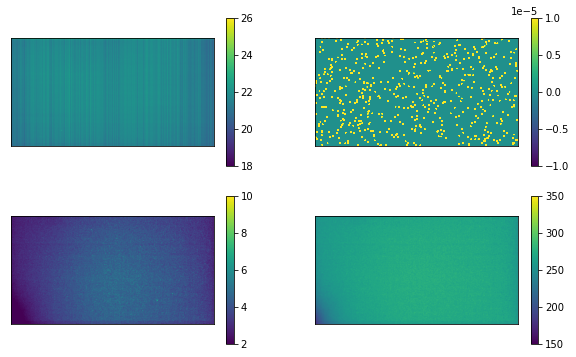

In [77]:
f, ax = plt.subplots(2, 2, figsize=(10, 6))

lim = [[18, 26], [-1e-5, 1e-5], [2, 10], [150, 350]]

for plane, a, l in zip(gen[0].data, ax.flatten(), lim):
    m = a.imshow(plane, vmin=l[0], vmax=l[1])
    plt.colorbar(m, ax=a)
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)    
print('bad pixel map is all 0? {}'.format(np.allclose(gen[0].data[1], 0)))

In [52]:
d = jp.getds9('licia')
d.imdisp(gen[0].data)

[0, 0, 0, 0]

In [54]:
col = fits.open('./data/liciacube_updated/luke_calibrated/calibration/liciacube_luke_cal_col_001.fits')
col.info()
for k, v in col[0].header.items():
    print('{:10s} = {}'.format(k, v))

Filename: ./data/liciacube_updated/luke_calibrated/calibration/liciacube_luke_cal_col_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (3, 2228224, 11)   float64   
SIMPLE     = True
BITPIX     = -64
NAXIS      = 3
NAXIS1     = 3
NAXIS2     = 2228224
NAXIS3     = 11
EXTEND     = True
